<a href="https://colab.research.google.com/github/Masahiro-459/machine_learning/blob/main/PyTorch_CrashCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=OIenNRt2bjg
このビデオからpytorchの基礎を学ぶ
# Tensor basics
Everything in PyTorch is based on Tensor operations. A Tensor is a multi-dimensional matrix containing elements of a single data type:

In [ ]:
import torch

# torch.empty(size): uninitallized
x = torch.empty(1) # scalar
print("empty(1):", x)

empty(1): tensor([0.])


初期化されていないテンソルを作成

In [ ]:
torch.empty(3) # vector

tensor([6.1319e-30, 3.1916e-41, 6.0608e-30])

In [ ]:
torch.empty(2 ,3) # matrix

tensor([[6.1291e-30, 3.1916e-41, 6.1321e-30],
        [3.1916e-41, 8.9683e-44, 0.0000e+00]])

In [ ]:
torch.empty(2, 2, 3) # tensor, 3 dimensions

tensor([[[2.1707e-18, 7.0952e+22, 1.7748e+28],
         [1.8176e+31, 7.2708e+31, 5.0778e+31]],

        [[3.2608e-12, 1.7728e+28, 7.0367e+22],
         [2.1715e-18, 4.2659e-08, 1.0781e-08]]])

0-1の間でランダムな値を持つテンソルを作成

In [ ]:
# torch.rand(size): random numbers [0, 1]
torch.rand(5, 3)

tensor([[0.7916, 0.6245, 0.1909],
        [0.3011, 0.1269, 0.1275],
        [0.4697, 0.1613, 0.2449],
        [0.2598, 0.7005, 0.5405],
        [0.7591, 0.5256, 0.3157]])

ゼロパディング

In [ ]:
# torch.zeros(size)
torch.zeros(5,3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
# torch.ones(size)
torch.ones(5, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

テンソルのサイズを調べる

In [ ]:
x = torch.empty(2,3)
x.size()

torch.Size([2, 3])

In [ ]:
x.shape

torch.Size([2, 3])

In [ ]:
# 上記二つの方法でシェイプを調べたら、添字を使うことで特定の数にアクセスできる
x.shape[1]

3

データ型を調べる float32がデフォルト

In [ ]:
x.dtype

torch.float32

型を変更することもできる

In [ ]:
x_f16 = torch.zeros( 5, 3, dtype=torch.float16)
x_f16.dtype

torch.float16

リストからテンソルを作る

In [ ]:
# construct from data
x = torch.tensor([5.5,3])
print(x, x.dtype)

tensor([5.5000, 3.0000]) torch.float32


テンソルはrequires_grad=True という引数を持つことができる

In [ ]:
# requires_grad argument
# this will tell pytorch that it will need to caluculate the gradients for this tensor
# later in your optimization steps
# i.e. this is a variable in your model that you want to optimize
x = torch.tensor([5.5, 3], requires_grad=True)
print(x)

tensor([5.5000, 3.0000], requires_grad=True)


## Operations with Tensors

In [ ]:
x = torch.ones(2, 2)
y = torch.rand(2, 2)

z = x + y
# torch.add(x, y)
# y.add_(x)
print(x)
print(y)
print(z)

tensor([[1., 1.],
        [1., 1.]])
tensor([[0.3049, 0.9018],
        [0.6943, 0.7895]])
tensor([[1.3049, 1.9018],
        [1.6943, 1.7895]])


In [ ]:
x = torch.ones(2,2)
y = torch.tensor([[2,2],[1,1]])

# subtraction
z = x - y
print(z)
# z = torch.sub(x, y)

# multiplication　これは掛け算というか、要素ごとの積であるアダマール積
z = x * y
# z = torch.mul(x, y)　これもアダマール除算
print(z)

# divison
z = x / y
# z = torch.div(x ,y)
print(z)

tensor([[-1., -1.],
        [ 0.,  0.]])
tensor([[2., 2.],
        [1., 1.]])
tensor([[0.5000, 0.5000],
        [1.0000, 1.0000]])


テンソルのスライス

In [ ]:
# Slicing
x = torch.rand(5,3)
print(x)
print("x[:, 0]", x[:, 0]) # all rows, column 0
print("x[1, :]",x[1, :]) # row 1, all columns
print("x[1,1]",x[1,1]) # element at 1, 1

# Get the actual value if only 1 element in your tensor
print("x[1,1].item()",x[1,1].item()) # 一つ上の行ではtensorオブジェクトだったが、数値として出てきた

tensor([[0.8752, 0.3502, 0.7509],
        [0.2623, 0.9283, 0.4906],
        [0.9200, 0.0507, 0.7833],
        [0.3642, 0.7589, 0.5861],
        [0.3723, 0.5461, 0.9213]])
x[:, 0] tensor([0.8752, 0.2623, 0.9200, 0.3642, 0.3723])
x[1, :] tensor([0.2623, 0.9283, 0.4906])
x[1,1] tensor(0.9283)
x[1,1].item() 0.9283342361450195


形を変える　これって使うの？

In [ ]:
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


## NumPy
Converting a Torch Tensor to a NumPy array and vice versa is very easy

In [ ]:
a = torch.ones(5)
print(a, type(a))

# torch to numpy with .numpy()
# torchからnumpyに変換　次の注意を要チェック
b = a.numpy()
print(b, type(b))

tensor([1., 1., 1., 1., 1.]) <class 'torch.Tensor'>
[1. 1. 1. 1. 1.] <class 'numpy.ndarray'>


**注意！**
もしテンソルがCPU上に存在すると、どちらのオブジェクトもメモリ上の同じ場所を共有する。
したがって、一つを変更するともう一つも変更されてしまう。（GPUではそうならない）

In [ ]:
# Careful: If the Tensor is on the CPU (not the GPU),
# both objects will share the same memory location, so cahnging one
# will also change the other
a.add_(1)
print(a)
print(b) # こっちはndarrayなのに変わっている！！！

tensor([3., 3., 3., 3., 3.])
[3. 3. 3. 3. 3.]


In [ ]:
# numpy to torch with .from_numpy(x), or torch.tensor() to copy it
# numpyからtorchに変換するときも注意
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
c = torch.tensor(a)

print(a)
print(b)
print(c)

# again be careful when modifying
a += 1
print(a)
print(b)
print(c)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


## GPU Support
By default all tensors are created on the CPU. But we can also move them to the GPU, or create them directly on the GPU.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x = torch.rand(2, 2).to(device) # move tensors to GPU device
x = torch.rand(2, 2, device=device) # or directly create them on GPU

device(type='cpu')

# Autograd
The autograd package provides automatic differentiation for all operations on Tensors.
これはpytorchでエッセンシャルな部分
requires_grad=Trueを設定すると、テンソルに対して行われる操作が計算グラフに記録される

In [ ]:
import torch

# requires_Grad = True -> tracks all operations on the tensor.
x = torch.randn(3, requires_grad=True)
y = x + 2

# y was created as a result of an operation, so it has a grad_fn attribute.
# grad_fn: references a function that has created the Tensor
print(x) # created by the user -> grad_fn is None
print(y)
print(y.grad_fn)

tensor([-0.5425, -0.5368, -0.5142], requires_grad=True)
tensor([1.4575, 1.4632, 1.4858], grad_fn=<AddBackward0>)


In [ ]:
# Do more operations on y
z = y * y * 3
print(z)
z = z.mean()
print(z)

tensor([6.3726, 6.4225, 6.6232], grad_fn=<MulBackward0>)
tensor(6.4728, grad_fn=<MeanBackward0>)


Let's compute the gradients with backpropagation
When we finish our computation we can call .backward() and have all the gradients computed automatically.
The gradient for this tensor will be accumlated int .grad attribute.
It is tha partial derivate of the function w.r.t. the tensor.

In [ ]:
print(x.grad) # この時点でxは grad アトリビュートを持っていないのでnoneになる
z.backward()
print(x.grad)

# !!!注意!!!　backward() accumlates the gradient for this tensor into .grad attribute.
# We need to be careful during optimization !!! optimaizer.zero_grad()

None
tensor([2.9149, 2.9263, 2.9717])


## Stop a tensor from tracking history:
For example during the training loop when we want to update our weights, or after training during evaluation. These operations should not be part of the gradient computation. To prevent this, we can use:


*   `x.requires_grad_(False)`
*   `x.detach()`
*   wrap in `with torch.no_grad():`

後から計算グラフのトラッキング(grad)を有効にする。<br>
.requires_grad_(...) changes an existing flag in-place.

In [ ]:
a = torch.randn(2, 2) # gradなしでインスタンスを作成
b = (a * a).sum()
print(a.requires_grad)
print(b.grad_fn)

a.requires_grad_(True) # 途中でgrad Trueへ変更したので、後でbackwardが出る
b = (a * a).sum()
print(a.requires_grad)
print(b.grad_fn)

False
None
True


後から計算グラフのトラッキング(grad)を無効にする。<br>
.detach(): get a new Tensor with the same content but no gradient coumputation:

In [ ]:
a = torch.randn(2, 2, requires_grad=True)
b = a.detach()

print(a.requires_grad)
print(b.requires_grad)

True
False


wrap in `with torch.no_grad():`<br>
モデルのトレーニング後の評価でよくみる.<br>
wを更新する際に、学習率と傾きをかけたものを与えるが、それは計算グラフとして保存せたくないので、こうする

In [ ]:
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
with torch.no_grad():
    b = a ** 2
    print(b.requires_grad)

True
False


## Gradient Descent Autograd<br>
Linear Regression example:<br>
f(x) = W * X + b<br>
ここでは次の線型回帰を行なってみる<br>
f(x) = 2 * x



In [ ]:
import torch

X = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8,10,12,14,16], dtype=torch.float32)

# 重みWベクトルを0.0で初期化する、トラッキングを有効にする
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model output
def forward(x):
    return w * x

# loss = MSE mean squaire error
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

In [ ]:
# 今作ったforward関数を試してみる.
# 初期値は0.0に設定しており、学習していないのでxを与えても、modelの出力は0のままになる
X_test = 5.0
print(f'Prediction before training: f({X_test}) = {forward(X_test).item():.3f}')

Prediction before training: f(5.0) = 0.000


学習を行い、wを更新する

In [ ]:
# Training
learning_rate = 0.01
n_epochs = 20

X1_test = 5.0
X2_test = 15

for epoch in range(n_epochs):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    loss_value = loss(Y, y_pred)

    # caluculate gradients = backward pass
    loss_value.backward()

    # update weights
    # w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
        # print(w.grad)
        w -= learning_rate * w.grad

    w.grad.zero_()

    if (epoch+1) % 1 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f} \
                        loss = {loss_value.item():.3f}')
print(f"Prediction after training: f({X1_test}) = {forward(X1_test).item():.3f}")
print(f"Prediction after training: f({X2_test}) = {forward(X2_test).item():.3f}")

epoch 1: w = 2.000                         loss = 0.000
epoch 2: w = 2.000                         loss = 0.000
epoch 3: w = 2.000                         loss = 0.000
epoch 4: w = 2.000                         loss = 0.000
epoch 5: w = 2.000                         loss = 0.000
epoch 6: w = 2.000                         loss = 0.000
epoch 7: w = 2.000                         loss = 0.000
epoch 8: w = 2.000                         loss = 0.000
epoch 9: w = 2.000                         loss = 0.000
epoch 10: w = 2.000                         loss = 0.000
epoch 11: w = 2.000                         loss = 0.000
epoch 12: w = 2.000                         loss = 0.000
epoch 13: w = 2.000                         loss = 0.000
epoch 14: w = 2.000                         loss = 0.000
epoch 15: w = 2.000                         loss = 0.000
epoch 16: w = 2.000                         loss = 0.000
epoch 17: w = 2.000                         loss = 0.000
epoch 18: w = 2.000                     

# 3. Model, Loss & Optimizer on MNIST
A typical PyTorch pipeline looks like this:<br>


1.   Forward = compute prediction and loss
2.   Backward = compute gradients
3.   Update weights



一つ前のステップではいろいろなことを自分自身で関数を書いてきた。wテンソルや順方向の計算など

In [ ]:
import torch
import torch.nn as nn

# Linear regression
# f = w * x
# here : f = 2 * x

# 0) Training samples, watch the shape!
# PyTorchのモデルクラスが特定の形しか受け付けないので、インナーリストを使っている
X = torch.tensor([[1], [2], [3], [4], [5], [6], [7], [8]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8],[10],[12],[14],[16]], dtype=torch.float32)
Y.add_(3)

n_samples, n_features = X.shape
print(f'n_sample = {n_samples}, n_features = {n_features}')

# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

n_sample = 8, n_features = 1


## 1. Design Model, the model has to implement the forward pass!
Here we could simply use a built-in model from PyTorch.<br>
model = nn.Linear(input_size, output_size)



In [ ]:
# PyTorchモデルクラスはいつもnn.Moduleから継承する
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define different layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)


input_size, output_size = n_features, n_features

model = LinearRegression(input_size, output_size)

print(f"Prediction before training: \
    f({X_test.item()}) = {model(X_test).item():.3f}")

# 2) Define loss and optimizer
learning_rate = 0.01
n_epochs = 500

loss = nn.MSELoss() # mean squaire error
# 確率的勾配降下法（SGD: Stochastic Gradient Descent）
# パラメータの更新を勾配の方向に進めることで、損失関数を最小化します。
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(n_epochs):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        w, b = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), \
              ': b = ', b.item(), ' loss = ', l.item())

print(f'Prediction after training: f({X_test.item()}) = {model(X_test).item():.3f}')

Prediction before training:     f(5.0) = -3.772
epoch  10 : w =  2.379188299179077 : b =  0.8574907779693604  loss =  0.953005313873291
epoch  20 : w =  2.3660731315612793 : b =  0.9418184757232666  loss =  0.8793575167655945
epoch  30 : w =  2.3517189025878906 : b =  1.0225275754928589  loss =  0.8117431998252869
epoch  40 : w =  2.3379268646240234 : b =  1.1000715494155884  loss =  0.7493292689323425
epoch  50 : w =  2.3246755599975586 : b =  1.1745749711990356  loss =  0.6917127966880798
epoch  60 : w =  2.311943769454956 : b =  1.2461568117141724  loss =  0.6385270953178406
epoch  70 : w =  2.299711227416992 : b =  1.3149313926696777  loss =  0.5894315838813782
epoch  80 : w =  2.2879583835601807 : b =  1.3810093402862549  loss =  0.5441100597381592
epoch  90 : w =  2.2766664028167725 : b =  1.4444959163665771  loss =  0.502273678779602
epoch  100 : w =  2.265817403793335 : b =  1.505492925643921  loss =  0.46365413069725037
epoch  110 : w =  2.2553937435150146 : b =  1.56409788131

# First Nural Network
GPU, Datasets, DataLoader, Transforms, Neural Net, Training & Evaluation

100%|██████████| 9912422/9912422 [00:00<00:00, 60859455.84it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 108544528.52it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 29808591.86it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22100381.40it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



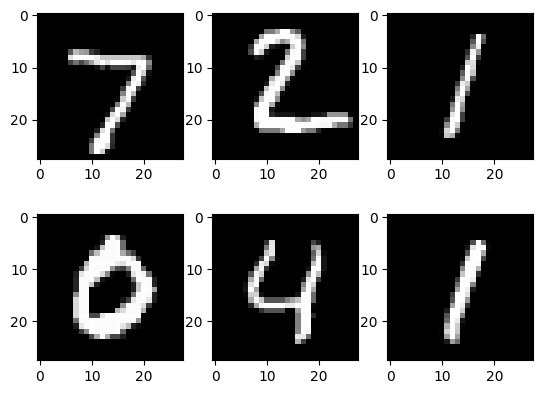

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyper-parameters
input_size = 784 # 28 * 28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=False,
                                           transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1) # 一つの描画キャンパスを複数の領域に分割する
    # 引数の説明（行の分割数,列の分割数,これからグラフを書くのに入り要するサブ領域の番号）
    plt.imshow(example_data[i][0], cmap="gray")
plt.show()

In [ ]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        # なぜなら、21行目のクロスエントロピー誤差のメソッドには生の値が必要になるから
        # 詳細はドキュメント見て（内部的にsoftmax関数を適用するらしい）
        return out

# .to()でmodelをプッシュしている。あとでテンソルも
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

#Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100,784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass and loss calcluation
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}")

Epoch [1/2], Step [100/600], Loss: 0.2858
Epoch [1/2], Step [200/600], Loss: 0.2519
Epoch [1/2], Step [300/600], Loss: 0.2105
Epoch [1/2], Step [400/600], Loss: 0.1983
Epoch [1/2], Step [500/600], Loss: 0.1087
Epoch [1/2], Step [600/600], Loss: 0.0779
Epoch [2/2], Step [100/600], Loss: 0.1289
Epoch [2/2], Step [200/600], Loss: 0.1050
Epoch [2/2], Step [300/600], Loss: 0.0857
Epoch [2/2], Step [400/600], Loss: 0.1477
Epoch [2/2], Step [500/600], Loss: 0.0799
Epoch [2/2], Step [600/600], Loss: 0.0670


## トレーニング後のテストを行う

In [ ]:
# Test the model: we dont't need to compute gradients
with torch.no_grad():
    n_correct = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        # テスト用のデータをリシェイプする必要がある
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images) # This is RAW data, not ReLU appried!

        # max returns (output_value , index)
        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()

    acc = n_correct / n_samples
    print(f"Accuracy of the network on the {n_samples} test images: {100*acc} %")


Accuracy of the network on the 10000 test images: 97.11999999999999 %


TypeError: ignored

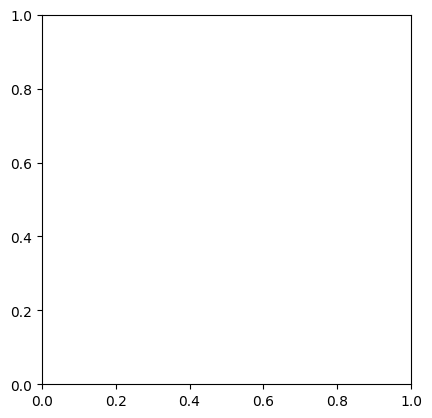

In [ ]:
for images, labels in test_loader:
    plt.imshow(images[1], cmap="gray")

# CNN
This section covers:
- Convolutional Layers
- MaxPooling
-Save/Load model

Files already downloaded and verified
Files already downloaded and verified


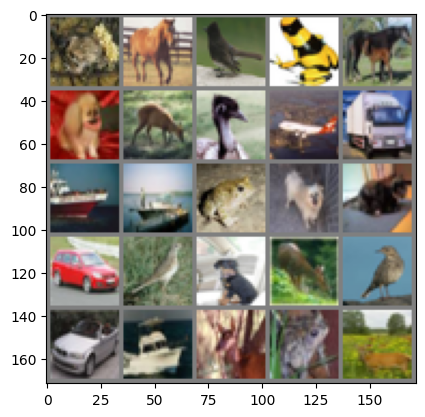

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyoer-parameters
num_epochs = 50
batch_size = 32
learning_rate = 0.001

# dataset has PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# CIFAR-10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True,
                                             download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False,
                                            download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=False)

classes = ("plane", "car", "bird", "cat",
           "deer", "dog", "frog", "horse", "ship", "truck")

def imshow(imgs):
    imgs = imgs / 2 + 0.5 # unnormalize
    npimgs = imgs.numpy()
    plt.imshow(np.transpose(npimgs, (1, 2, 0)))
    plt.show()

# one batch of random training images
dataiter = iter(train_loader)
images, labels = next(dataiter) # error occoerd when "dataiter.next()""
img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)
imshow(img_grid)

"torchvision.transforms.Compose" は、画像に対して一連の処理を順番に適用するためのツールです。これを使うと、例えば「画像をリサイズする → 画像を反転する → 画像の色を調整する」といった一連の処理を順番に実行することができます。

考え方としては、Composeには「やりたい処理のリスト」を渡します。そして、このリストに記述された順番で処理が画像に適用されます。

今回だと、まず画像をテンソルに変換し、64x64のサイズにリサイズします。

In [2]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        # 各レイヤーのアウトプットサイズは、次のレイヤーのインプットサイズと同じでなければならない
        self.conv1 = nn.Conv2d(3, 32, 3) # (channel amout, output size)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64*4*4, 64) # flatten 何してるかわからない
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        # N, 3 channel, image size = 32 x 32
        x = F.relu(self.conv1(x)) # -> N, 32, 30, 30
        x = self.pool(x)          # -> N, 32, 15, 15
        x = F.relu(self.conv2(x)) # -> N, 64, 13, 13
        # reluはinitに入れてもいいし、これみたいに独自にやってもいい。個人の好み
        x = self.pool(x)          # -> N, 64,  6,  6
        x = F.relu(self.conv3(x)) # -> N, 64,  4,  4
        x = torch.flatten(x, 1)   # -> N, 1024
        x = F.relu(self.fc1(x))   # -> N, 64
        x = self.fc2(x)           # -> N, 10
        return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 100
n_total_steps = len(train_loader)
for epoch in range(num_epochs):

    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()


    loss_whole = running_loss / n_total_steps
    print(f"[{epoch + 1}] loss: {loss_whole:.3f}")

    if loss_whole < 0.08:
        break

print("Finished Training")
PATH = "./cnn.pth"
torch.save(model.state_dict(), PATH)

[1] loss: 1.521
[2] loss: 1.156
[3] loss: 0.995
[4] loss: 0.887
[5] loss: 0.817
[6] loss: 0.756
[7] loss: 0.708
[8] loss: 0.664
[9] loss: 0.625
[10] loss: 0.590
[11] loss: 0.557
[12] loss: 0.530
[13] loss: 0.504
[14] loss: 0.479
[15] loss: 0.454
[16] loss: 0.432
[17] loss: 0.406
[18] loss: 0.385
[19] loss: 0.366
[20] loss: 0.347
[21] loss: 0.328
[22] loss: 0.312
[23] loss: 0.301
[24] loss: 0.287
[25] loss: 0.274
[26] loss: 0.260
[27] loss: 0.250
[28] loss: 0.241
[29] loss: 0.230
[30] loss: 0.226
[31] loss: 0.212
[32] loss: 0.204
[33] loss: 0.196
[34] loss: 0.198
[35] loss: 0.182
[36] loss: 0.181
[37] loss: 0.180
[38] loss: 0.173
[39] loss: 0.169
[40] loss: 0.164
[41] loss: 0.156
[42] loss: 0.161
[43] loss: 0.147
[44] loss: 0.149
[45] loss: 0.148
[46] loss: 0.142
[47] loss: 0.143
[48] loss: 0.138
[49] loss: 0.131
[50] loss: 0.137
[51] loss: 0.130
[52] loss: 0.128
[53] loss: 0.126
[54] loss: 0.122
[55] loss: 0.126
[56] loss: 0.122
[57] loss: 0.123
[58] loss: 0.120
[59] loss: 0.117
[60] l

In [3]:
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(PATH))
loaded_model.to(device)
loaded_model.eval() # set internal configuration

with torch.no_grad():
    n_correct = 0
    n_correct2 = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images) # model from the last time

        # max returns (value, index)
        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item() # この計算が理解できない

        outputs2 = loaded_model(images) # model from the loaded model
        _, predicted2 = torch.max(outputs2, 1)
        n_correct2 += (predicted2 == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f"Accuracy of the model: {acc} %")

    acc = 100.0 * n_correct2 / n_samples
    print(f"Accuracy of the loaded model: {acc} %")

Accuracy of the model: 68.42 %
Accuracy of the loaded model: 68.42 %
